# 데이터 분할
* Train : Val : Test = 6 : 2 : 2
* 학습에 사용할 데이터의 수가 많지 않을 경우 Val / Test 에 사용 될 데이터의 수량을 충분히 확보할 필요가 있다
* 수백만 건 이상의 데이터를 활용하는 딥러닝 분석에서는 데이터 자체가 방대하기에 Val/ Test 비율을 줄이고 더 많은 데이터를 모델 최적화에 사용

* from sklearn.model_selection import train_test_split
* X_train, X_test, y_train, Y_test = train_test_split(arrays, test_size = None, train_size = None, random_state = None, shuffle = True, stratify = None)
    * X : 독립변수 테이블
    * Y : 종속변수 테이블
    * test_size : 테스트 사이즈 비율
    * random_state : 임의의 번호지정, 같은 숫자 사용하면 같은 출력
    * shuffle : True이면 추출전에 데이터를 섞음, False이면 섞이지 않음
    * stratify : None이 아닌 경우 데이터는 지정한 변수를 기준으로 계층화 되어 해당 변수의 비율을 유지하도록 추출

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [4]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2)
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [6]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
16,5.4,3.9,1.3,0.4
64,5.6,2.9,3.6,1.3
11,4.8,3.4,1.6,0.2


In [7]:
y_train.head(3)

16         Setosa
64    Versicolour
11         Setosa
Name: Class, dtype: object

In [8]:
iris['Class'].value_counts()

Class
Setosa         50
Versicolour    50
Virginica      50
Name: count, dtype: int64

In [9]:
y_train.value_counts()

Class
Setosa         42
Virginica      40
Versicolour    38
Name: count, dtype: int64

* stratify 를 지정하지 않은 경우, 무작위 임의 추출의 수행결과 종속변수인 'Class'컬럼의 각 범주의 개수 비율이 원본데이터와 차이가 남
* 무작위 임의 추출의 결과가 원본을 충분히 반영하지 못한다면 분석 성능에 큰 악 영향을 미칠수 있다
 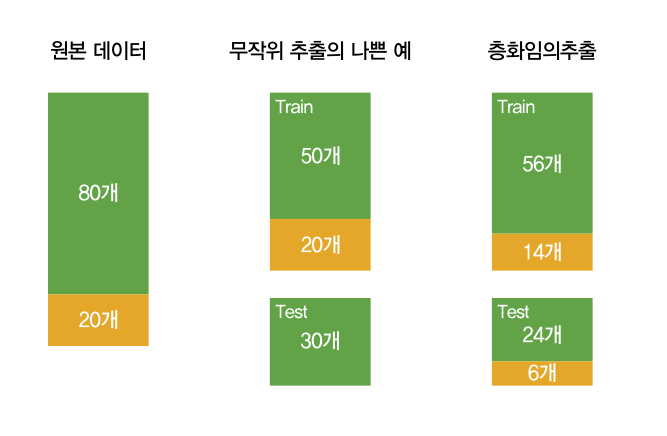


* train_test_split에서 stratify인자는 층화임의추출 여부를 결정
* 층화임의추출이란 모집단이 이질적인 몇개의 계층으로 이루어져 있을때, 모든 계층으로부터 원소를 임의로 추출하여 각 계층을 고루 대표할 수 있도록 랜덤하게 표본을 추출하는 방법
* 어떤 범주형 변수가 Train/test 에서 원본 데이터와 같은 비율로 분포 되어야할 때, 범주형 변수의 범주들의 개수 차이가 크게날 때 사용

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size = 0.2, stratify =iris['Class'])
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [11]:
y_train.value_counts()

Class
Virginica      40
Setosa         40
Versicolour    40
Name: count, dtype: int64